<a href="https://colab.research.google.com/github/nhlong1512/IS403.N21/blob/main/Final/Final04052023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
path = 'BTC-USD.csv'

df = pd.read_csv(path)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2019,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
1,1/2/2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09
2,1/3/2019,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09
3,1/4/2019,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09
4,1/5/2019,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5.137610e+09


In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00


In [4]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm
model = pm.auto_arima(df.Close, start_p=0, 
                      start_q=0,max_p=5, max_q=5, 
                      m=12,start_P=0, seasonal=False,
                      d=0, D=0, trace=True,error_action='ignore',
                      suppress_warnings=True, stepwise=True)

print(model.aic())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36279.536, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=34218.160, Time=0.77 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26107.157, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26108.642, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26109.006, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=2.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26110.589, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26107.301, Time=0.51 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 4.808 seconds
26107.156666437244


Vậy ARIMA(1,0,1) là phù hợp nhất


**<h3>Xây dựng mô hình ARIMA</h3>**

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# 1,0,1 ARIMA Model
model = ARIMA(df.Close, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1551
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -13049.426
Date:                Thu, 04 May 2023   AIC                          26106.853
Time:                        13:56:13   BIC                          26128.239
Sample:                             0   HQIC                         26114.807
                               - 1551                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.349e+04   9727.840      2.415      0.016    4424.076    4.26e+04
ar.L1          0.9977      0.001    759.636      0.000       0.995       1.000
ma.L1         -0.0278      0.018     -1.534      0.1

**<h3>Dự báo</h3>**

**<h3>Dự đoán trên bộ dữ liệu với Train-Test là 7-3</h3>**

In [70]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf

# Chia dữ liệu train-test theo tỷ lệ 7-3
train, test = train_test_split(df, test_size=0.3, shuffle=False)

# Hiển thị kích thước của tập train và tập test
print(len(train))
print(len(test))
# train = df.Close[:len(train)]
# test = df.Close[len(train):]

1085
466


In [71]:
print(test.iloc[0],test.iloc[-1])

Date            12/21/2021
Open           46886.07813
High           49300.91797
Low            46698.77344
Close          48936.61328
Adj Close      48936.61328
Volume       27055803928.0
forecast      46819.505645
Name: 1085, dtype: object Date             3/31/2023
Open           28032.26172
High           28639.89648
Low            27583.71484
Close          28478.48438
Adj Close      28478.48438
Volume       19001327598.0
forecast      31373.046918
Name: 1550, dtype: object


In [72]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
model=ARIMA(train['Close'],order=(1,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1085
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9175.915
Date:                Thu, 04 May 2023   AIC                          18359.831
Time:                        16:42:10   BIC                          18379.788
Sample:                             0   HQIC                         18367.386
                               - 1085                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.17e+04   2.79e+04      0.777      0.437   -3.31e+04    7.65e+04
ar.L1          0.9988      0.002    564.777      0.000       0.995       1.002
ma.L1         -0.0431      0.021     -2.028      0.043      -0.085      -0.001
sigma2      1.295e+06   2.49e+04     51.985      0.000    1.25e+06    1.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3083.67
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              35.32   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1085    46840.564394
1086    46809.536077
1087    46778.546053
1088    46747.594276
1089    46716.680698
1090    46685.805273
1091    46654.967953
1092    46624.168691
1093    46593.407440
1094    46562.684154
1095    46531.998785
1096    46501.351287
1097    46470.741612
1098    46440.169715
1099    46409.635549
Name: predicted_mean, dtype: float64
Mean Squared Error: 229937041.15856016


AttributeError: ignored

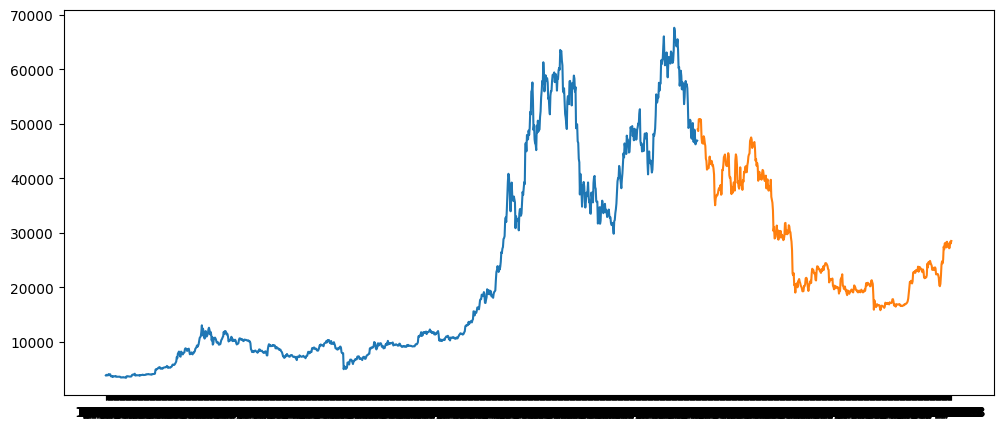

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Split data into train and test sets
train_data, test_data = train_test_split(df[['Date','Close']], test_size=0.3, shuffle=False)

# Train the ARIMA model
model = ARIMA(train_data.Close, order=(1,0,1))
fitted = model.fit()

# Forecast
print(fitted.forecast(15, alpha=0.05))  # 95% conf
fc = fitted.forecast(len(test_data))
conf = fitted.conf_int(alpha=0.05)

# Calculate mean squared error
mse = mean_squared_error(test_data.Close, fc)
print('Mean Squared Error:', mse)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.Close)
lower_series = pd.Series(df.iloc[:, 0], index=test_data.Close)
upper_series = pd.Series(df.iloc[:, 1], index=test_data.Close)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['Date'],train_data['Close'], label='training')
plt.plot(test_data['Date'],test_data['Close'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.Close, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.3, shuffle=False)
print(df)

# Train the ARIMA model
model = ARIMA(train_data, order=(1,0,1))
fitted = model.fit()

# Forecast
print(fitted.forecast(15, alpha=0.05))  # 95% conf
fc = fitted.forecast(len(test_data))
conf = fitted.conf_int(alpha=0.05)

# Calculate mean squared error
mse = mean_squared_error(test_data, fc)
print('Mean Squared Error:', mse)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(df.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(df.iloc[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

           Date          Open          High           Low         Close  \
0      1/1/2019   3746.713379   3850.913818   3707.231201   3843.520020   
1      1/2/2019   3849.216309   3947.981201   3817.409424   3943.409424   
2      1/3/2019   3931.048584   3935.685059   3826.222900   3836.741211   
3      1/4/2019   3832.040039   3865.934570   3783.853760   3857.717529   
4      1/5/2019   3851.973877   3904.903076   3836.900146   3845.194580   
...         ...           ...           ...           ...           ...   
1546  3/27/2023  27994.068360  28037.925780  26606.689450  27139.888670   
1547  3/28/2023  27132.888670  27460.718750  26677.818360  27268.130860   
1548  3/29/2023  27267.031250  28619.542970  27259.662110  28348.441410   
1549  3/30/2023  28350.140630  29159.902340  27720.160160  28033.562500   
1550  3/31/2023  28032.261720  28639.896480  27583.714840  28478.484380   

         Adj Close        Volume      forecast  
0      3843.520020  4.324201e+09           NaN  
1

ValueError: ignored

In [44]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.Close)

<ipython-input-44-d5866cac8356>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-44-d5866cac8356>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-44-d5866cac8356>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-44-d5866cac8356>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:

{'mape': 0.6291231605880453,
 'me': 13167.03636761129,
 'mae': 13398.44571919728,
 'mpe': 0.6243257494105823,
 'rmse': 15163.67505450312,
 'corr': 0.8261522435427171,
 'minmax': 0.33840804317158}

**<h3>Dự đoán trên bộ dữ liệu với Train-Test là 8-2</h3>**

In [47]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf

# Chia dữ liệu train-test theo tỷ lệ 8-2
train, test = train_test_split(df.Close, test_size=0.2, shuffle=False)

# Hiển thị kích thước của tập train và tập test
print(len(train))
print(len(test))
train = df.Close[:len(train)]
test = df.Close[len(train):]

1240
311


In [48]:
print(df.shape)
print(-(len(test)))
train=df.iloc[:-(len(test))]
test=df.iloc[-(len(test)):]
print(train.shape,test.shape)
print(test.Close)

(1551, 8)
-311
(1240, 8) (311, 8)
1240    29562.36133
1241    29267.22461
1242    28627.57422
1243    28814.90039
1244    29445.95703
           ...     
1546    27139.88867
1547    27268.13086
1548    28348.44141
1549    28033.56250
1550    28478.48438
Name: Close, Length: 311, dtype: float64


In [49]:
print(test.iloc[0],test.iloc[-1])

Date             5/25/2022
Open           29653.13477
High           30157.78516
Low            29384.94922
Close          29562.36133
Adj Close      29562.36133
Volume       27525063551.0
forecast        39739.2709
Name: 1240, dtype: object Date             3/31/2023
Open           28032.26172
High           28639.89648
Low            27583.71484
Close          28478.48438
Adj Close      28478.48438
Volume       19001327598.0
forecast      31373.046918
Name: 1550, dtype: object


In [50]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
model=ARIMA(train['Close'],order=(1,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10518.311
Date:                Thu, 04 May 2023   AIC                          21044.622
Time:                        15:43:18   BIC                          21065.114
Sample:                             0   HQIC                         21052.329
                               - 1240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.405e+04    1.2e+04      2.011      0.044     609.680    4.75e+04
ar.L1          0.9978      0.002    646.029      0.000       0.995       1.001
ma.L1         -0.0373      0.021     -1.762      0.078      -0.079       0.004
sigma2      1.363e+06    2.6e+04     52.491      0.000    1.31e+06    1.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2557.79
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              29.25   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1240    29623.826176
1241    29611.654532
1242    29599.509444
1243    29587.390854
1244    29575.298704
1245    29563.232937
1246    29551.193495
1247    29539.180321
1248    29527.193357
1249    29515.232546
1250    29503.297831
1251    29491.389155
1252    29479.506462
1253    29467.649694
1254    29455.818795
Name: predicted_mean, dtype: float64
Mean Squared Error: 58826133.41236973


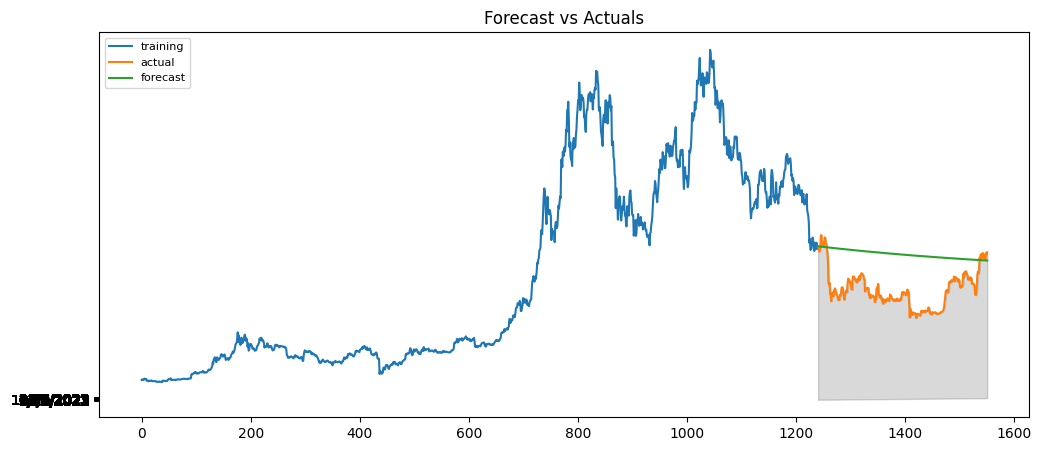

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Split data into train and test sets
train_data, test_data = train_test_split(df['Close'], test_size=0.2, shuffle=False)

# Train the ARIMA model
model = ARIMA(train_data, order=(1,0,1))
fitted = model.fit()

# Forecast
print(fitted.forecast(15, alpha=0.05))  # 95% conf
fc = fitted.forecast(len(test_data))
conf = fitted.conf_int(alpha=0.05)

# Calculate mean squared error
mse = mean_squared_error(test_data, fc)
print('Mean Squared Error:', mse)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(df.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(df.iloc[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [54]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.Close)

<ipython-input-54-d5866cac8356>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-54-d5866cac8356>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-54-d5866cac8356>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-54-d5866cac8356>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:

{'mape': 0.3595276096743347,
 'me': 6820.357141125019,
 'mae': 6974.420542199389,
 'mpe': 0.3542905078026383,
 'rmse': 7669.819646665085,
 'corr': 0.1773965763225625,
 'minmax': 0.24805498439383367}